In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Prve cviko

## Neriadene 

Nestabilne bez riadenia alebo ak pouzijeme a<0 tak je stabilne

In [63]:
# Rovnica v tvare d/d
def fcn_difRovnice(x, t, param ):
    a = param
    u=0
    dotx = a*x+u
    return dotx

In [64]:
# Implementacia ode
def fcn_sim( t_start , t_final , T_s , param ):
    t_log = np.arange ( sim_t_start , sim_t_final + sim_T_s , sim_T_s ).reshape(-1,1)
    x_0 = 1

    odeOut = odeint( fcn_difRovnice ,x_0 ,t_log [: ,0] ,args =( param ,))

    return [t_log , odeOut ]

In [65]:
# Vypocet
sim_t_start = 0
sim_t_final = 3
sim_T_s = 0.1
param = 1

t_log , x_log , = fcn_sim ( sim_t_start , sim_t_final , sim_T_s ,param )

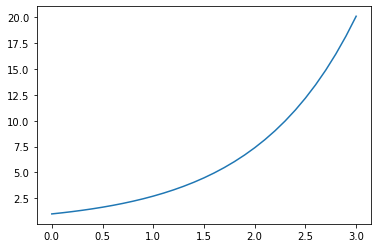

In [66]:
plt.plot(t_log,x_log)

## Riadenie

In [67]:
# Rovnica v tvare d/d
def fcn_difRovnice_02(x, t, param_a):
    x, k = x
    a = param_a
    dotk = x**2
    u = -k*x
    dotx = a*x + u

    return [dotx, dotk]

In [68]:
# Implementacia
def fcn_simSch_02(t_start, t_final, T_s, param_a):
    t_log = np.arange(sim_t_start, sim_t_final+sim_T_s, sim_T_s).reshape(-1,1)
    x_0 = [1, 0]
    odeOut = odeint(fcn_difRovnice_02,x_0,t_log[:,0],args=(param_a,))

    return [t_log, odeOut]

In [69]:
# Vypocet
sim_t_start = 0
sim_t_final = 5
sim_T_s = 0.05
param = 1

t_log, x_log, = fcn_simSch_02(sim_t_start, sim_t_final, sim_T_s, param_a)

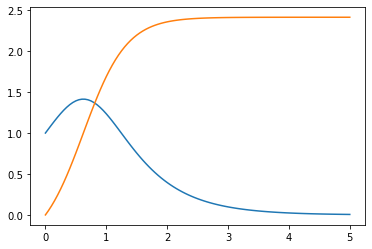

In [70]:
plt.plot(t_log,x_log)

## Diskretne riadenie z predoslej ulohy

In [71]:
# Rovnica v tvare d/d
def fcn_difRovnice_01(x, t, a, u):
    dotx = a*x + u

    return dotx                                                 

In [72]:
# Implementacia
def fcn_simSch_03(t_start, T_s, finalIndex, param_a):
    t_log = np.zeros([finalIndex, 1])
    t_log[0,:] = t_start
    x_0 = np.array([1])
    x_log = np.zeros([finalIndex, len(x_0)])
    x_log[0,:] = x_0
    k_log = np.zeros([finalIndex, 1])
    u_log = np.zeros([finalIndex, 1])
    timespan = np.zeros(2)
    
    for idx in range(1, int(finalIndex)):
        timespan[0] = t_log[idx-1,:]
        timespan[1] = t_log[idx-1,:] + T_s

        odeOut = odeint(fcn_difRovnice_01,x_log[idx-1,:],timespan,args=(param, u_log[idx-1,:]))

        x_log[idx,:] = odeOut[-1,:]
        t_log[idx,:] = timespan[-1]

        deltk = x_log[idx-1,:]*x_log[idx-1,:]
        k_log[idx,:] = k_log[idx-1,:] +  (deltk * T_s)
        u_log[idx,:] = -k_log[idx-1,:] * x_log[idx-1,:]

    return [t_log, x_log, u_log, k_log]

In [73]:
# Vypocet
sim_t_start = 0
sim_t_final = 5
sim_T_s = 0.05
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)
param = 1


t_log, x_log, u_log, k_log, = fcn_simSch_03(sim_t_start,sim_T_s,sim_finalIndex,param,)

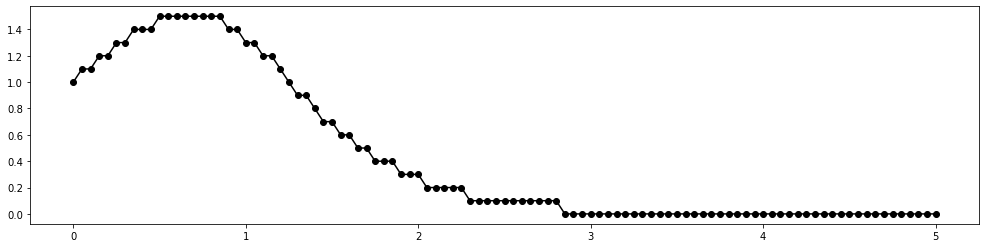

In [74]:
x_log1 = 0.1 * np.round(x_log/0.1)

plt.figure(figsize=(17, 4))
display(plt.plot(t_log,x_log1,'-ok'))

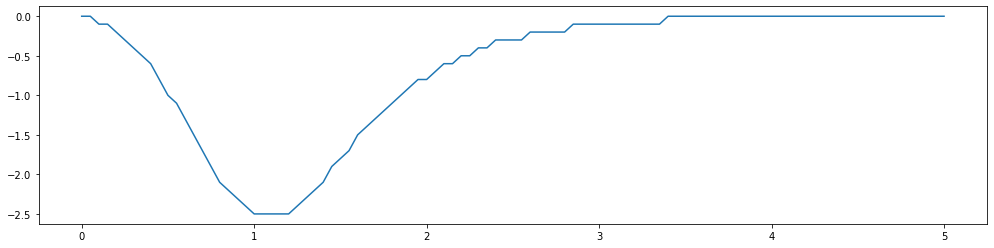

In [75]:
u_log1 = 0.1 * np.round(u_log/0.1)

plt.figure(figsize=(17, 4))
display(plt.plot(t_log,u_log1))

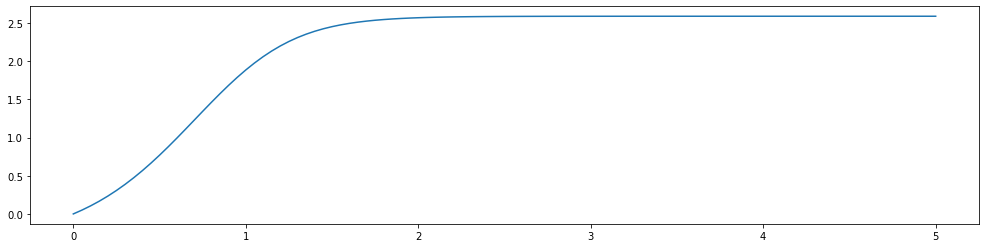

In [76]:

plt.figure(figsize=(17, 4))
display(plt.plot(t_log,k_log))